In [11]:
#### suponiendo sitribucion estacionaria


# Distribuciones Cambiantes

In [12]:

import numpy as np
import pandas as pd
from scipy.stats import beta

# Paso 0: parámetros
n_activos = 12  # Número de activos
periodos = 1825  # Número de días (365 días hábiles en un año) 4 AÑOS
ventana_adts = 121  # Cada cuántos días cambia la media

# Generar fechas para todo un año con días hábiles
fechas = pd.date_range('1974-01-01', periods=periodos)

# Inicializar matrices para los retornos y para las medias verdaderas
data = np.zeros((periodos, n_activos))  # Matriz de retornos simulados
medias_reales = np.zeros((periodos, n_activos))  # Matriz para almacenar las medias verdaderas

# Definir intervalos específicos para las medias de cada activo
# Cada activo tiene un rango único de distribución uniforme
intervalos_uniformes = [
    (-1, 1),    # Activo 1
    (0, 2),     # Activo 2
    (-2, 0),    # Activo 3
    (1, 3),     # Activo 4
    (-0.5, 0.5), # Activo 5
    (0, 1.5),   # Activo 6
    (1, 2),     # Activo 7
    (2, 4),     # Activo 8
    (-3, -1),   # Activo 9
    (0.5, 1.5), # Activo 10
    (-1.5, -0.5), # Activo 11
    (0, 3)      # Activo 12
]

# Generación de los datos
for t in range(periodos):
    # Cambiar las medias cada ventana_adts días
    if t % ventana_adts == 0:
        medias_fijas = np.array([
            np.random.uniform(low, high) for low, high in intervalos_uniformes
        ])
    
    # Generar los retornos con una distribución normal centrada en las medias actuales
    data[t, :] = np.random.normal(loc=medias_fijas, scale=1, size=n_activos)

    # Registrar las medias verdaderas para cada activo
    medias_reales[t, :] = medias_fijas

# Crear DataFrames de los retornos y las medias reales
df = pd.DataFrame(data, index=fechas, columns=[f'Activo_{i+1}' for i in range(n_activos)])
df_medias = pd.DataFrame(medias_reales, index=fechas, columns=[f'Activo_{i+1}' for i in range(n_activos)])

In [13]:
df_medias

Activo_1  Activo_2  Activo_3  Activo_4  Activo_5  Activo_6  \
1974-01-01 -0.318831  1.338608 -0.563775  1.528093 -0.410796  0.348484   
1974-01-02 -0.318831  1.338608 -0.563775  1.528093 -0.410796  0.348484   
1974-01-03 -0.318831  1.338608 -0.563775  1.528093 -0.410796  0.348484   
1974-01-04 -0.318831  1.338608 -0.563775  1.528093 -0.410796  0.348484   
1974-01-05 -0.318831  1.338608 -0.563775  1.528093 -0.410796  0.348484   
...              ...       ...       ...       ...       ...       ...   
1978-12-26 -0.877851  0.972032 -0.936290  2.350208  0.165993  0.030731   
1978-12-27 -0.877851  0.972032 -0.936290  2.350208  0.165993  0.030731   
1978-12-28 -0.877851  0.972032 -0.936290  2.350208  0.165993  0.030731   
1978-12-29 -0.877851  0.972032 -0.936290  2.350208  0.165993  0.030731   
1978-12-30 -0.877851  0.972032 -0.936290  2.350208  0.165993  0.030731   

            Activo_7  Activo_8  Activo_9  Activo_10  Activo_11  Activo_12  
1974-01-01  1.634570  2.911649 -2.558344   0.543159  -1.142832   1.867771  
1974-01-02  1.634570  2.911649 -2.558344   0.543159  -1.142832   1.867771  
1974-01-03  1.634570  2.911649 -2.558344   0.543159  -1.142832   1.867771  
1974-01-04  1.634570  2.911649 -2.558344   0.543159  -1.142832   1.867771  
1974-01-05  1.634570  2.911649 -2.558344   0.543159  -1.142832   1.867771  
...              ...       ...       ...        ...        ...        ...  
1978-12-26  1.405309  3.889194 -2.146918   0.507955  -1.412850   0.460543  
1978-12-27  1.405309  3.889194 -2.146918   0.507955  -1.412850   0.460543  
1978-12-28  1.405309  3.889194 -2.146918   0.507955  -1.412850   0.460543  
1978-12-29  1.405309  3.889194 -2.146918   0.507955  -1.412850   0.460543  
1978-12-30  1.405309  3.889194 -2.146918   0.507955  -1.412850   0.460543  

[1825 rows x 12 columns]

# Distribuciones Estacionarias (Ya no correr)

In [14]:
#n_activos = 44  # Número de activos
#periodos = 1825  # Este es T: Número de días (365 días hábiles en un año) 4 AÑOS
#ventana_adts = 121  # Cada cuántos días cambia la media

# Generar fechas para todo un año con días hábiles
#fechas = pd.date_range('1974-01-01', periods=periodos)

# Inicializar matrices para los retornos y para las medias verdaderas
#data = np.zeros((periodos, n_activos))  # Matriz de retornos simulados
#medias_reales = np.zeros((periodos, n_activos))  # Matriz para almacenar las medias verdaderas

# Generar los retornos con medias dinámicas y registrar las medias reales
#for t in range(periodos):
    # Cambiar la media cada ventana_adts días
#    if t % ventana_adts == 0:
        # Crear nuevas medias entre -1 y 1 para cada activo
#        medias_actuales = np.random.uniform(-1, 1, n_activos)

    # Generar los retornos con una distribución normal centrada en las medias actuales
#    data[t, :] = np.random.normal(loc=medias_actuales, scale=1, size=n_activos)

    # Registrar las medias verdaderas para cada activo
#    medias_reales[t, :] = medias_actuales

# Crear DataFrames de los retornos y las medias reales
#df = pd.DataFrame(data, index=fechas, columns=[f'Activo_{i+1}' for i in range(n_activos)])
#df_medias = pd.DataFrame(medias_reales, index=fechas, columns=[f'Activo_{i+1}' for i in range(n_activos)])


In [15]:
df_medias

Activo_1  Activo_2  Activo_3  Activo_4  Activo_5  Activo_6  \
1974-01-01 -0.318831  1.338608 -0.563775  1.528093 -0.410796  0.348484   
1974-01-02 -0.318831  1.338608 -0.563775  1.528093 -0.410796  0.348484   
1974-01-03 -0.318831  1.338608 -0.563775  1.528093 -0.410796  0.348484   
1974-01-04 -0.318831  1.338608 -0.563775  1.528093 -0.410796  0.348484   
1974-01-05 -0.318831  1.338608 -0.563775  1.528093 -0.410796  0.348484   
...              ...       ...       ...       ...       ...       ...   
1978-12-26 -0.877851  0.972032 -0.936290  2.350208  0.165993  0.030731   
1978-12-27 -0.877851  0.972032 -0.936290  2.350208  0.165993  0.030731   
1978-12-28 -0.877851  0.972032 -0.936290  2.350208  0.165993  0.030731   
1978-12-29 -0.877851  0.972032 -0.936290  2.350208  0.165993  0.030731   
1978-12-30 -0.877851  0.972032 -0.936290  2.350208  0.165993  0.030731   

            Activo_7  Activo_8  Activo_9  Activo_10  Activo_11  Activo_12  
1974-01-01  1.634570  2.911649 -2.558344   0.543159  -1.142832   1.867771  
1974-01-02  1.634570  2.911649 -2.558344   0.543159  -1.142832   1.867771  
1974-01-03  1.634570  2.911649 -2.558344   0.543159  -1.142832   1.867771  
1974-01-04  1.634570  2.911649 -2.558344   0.543159  -1.142832   1.867771  
1974-01-05  1.634570  2.911649 -2.558344   0.543159  -1.142832   1.867771  
...              ...       ...       ...        ...        ...        ...  
1978-12-26  1.405309  3.889194 -2.146918   0.507955  -1.412850   0.460543  
1978-12-27  1.405309  3.889194 -2.146918   0.507955  -1.412850   0.460543  
1978-12-28  1.405309  3.889194 -2.146918   0.507955  -1.412850   0.460543  
1978-12-29  1.405309  3.889194 -2.146918   0.507955  -1.412850   0.460543  
1978-12-30  1.405309  3.889194 -2.146918   0.507955  -1.412850   0.460543  

[1825 rows x 12 columns]

In [16]:
df

Activo_1  Activo_2  Activo_3  Activo_4  Activo_5  Activo_6  \
1974-01-01  0.509461  0.999947 -0.417388  2.762946  0.524060  1.072778   
1974-01-02 -0.283730  1.248421 -0.957035  1.429202 -0.270606  0.243988   
1974-01-03  0.000585  1.486283  0.048734  0.432642  0.098423  0.986873   
1974-01-04 -0.385187  1.108490 -1.192300  1.338134 -1.098544  1.538290   
1974-01-05  2.628298  1.159816 -1.227302  1.452437  0.369369 -1.230112   
...              ...       ...       ...       ...       ...       ...   
1978-12-26  1.155975  0.476663  0.259195  1.503659  0.334892  0.135845   
1978-12-27 -0.351155  0.651844 -1.122597  1.296222 -0.366103  0.012749   
1978-12-28 -1.585443 -0.219887 -1.775579  3.495442 -0.014734  1.057859   
1978-12-29  1.159592  2.523352 -1.162784  3.357282  0.423468 -0.167091   
1978-12-30 -0.474922 -1.055660  0.914414  3.233819 -0.108749  0.826839   

            Activo_7  Activo_8  Activo_9  Activo_10  Activo_11  Activo_12  
1974-01-01  3.136272  2.978997 -1.668231   0.031450  -0.208575   2.149456  
1974-01-02  2.631952  3.134490 -2.719494   1.282054   0.000552   0.137557  
1974-01-03  1.791347  3.412580 -0.584963   2.155273  -2.416778   1.389137  
1974-01-04  1.750661  2.454536 -3.072462   1.810754   0.184666   0.874126  
1974-01-05  1.719252  1.244342 -2.239908   0.123319  -2.233411   1.966520  
...              ...       ...       ...        ...        ...        ...  
1978-12-26  2.174061  3.042103 -1.910978   2.177875  -1.905298   0.207953  
1978-12-27  0.069705  4.054779 -2.345075   0.083332  -2.579531  -0.982106  
1978-12-28  2.121290  5.002703 -2.430459  -0.205631  -1.330951  -0.380801  
1978-12-29  1.931715  3.540874 -1.715629   1.499503  -0.537080  -0.467751  
1978-12-30  1.034028  3.082166 -2.257146   0.063753   0.106233   0.902777  

[1825 rows x 12 columns]

In [17]:
# Definimos la función de Thompson Sampling Adaptado con Descuento
resultado_df = df
resultado_df_verdad = df_medias

def adaptive_discounted_thompson_sampling(returns, gamma, w):
    """
    Adaptive Discounted Thompson Sampling (Algorithm 1).

    Parameters:
        returns (pd.DataFrame): DataFrame donde las filas son días y las columnas son portafolios,
                                y los valores son los retornos diarios.
        gamma (float): Factor de descuento (0 < gamma <= 1).
        w (int): Tamaño de la ventana deslizante (1 <= w <= T). 

    Returns:
        actions (list): Índices de los portafolios seleccionados cada día.
        observed_rewards (list): Retornos observados para los portafolios seleccionados.
    """
    T, K = returns.shape  # T: número de días, K: número de portafolios
    returns_binario = returns.apply(lambda row: row == row.max(), axis=1).astype(int)
    
    # Inicializar parámetros alpha y beta
    alpha = np.ones(K)  # α_k inicializado en 1
    beta_params = np.ones(K)  # β_k inicializado en 1

    actions = []  # Almacenar los portafolios elegidos
    observed_rewards = []  # Almacenar los retornos observados
    eventos = []  # Almacenar los eventos (1 si la acción fue correcta)

    for t in range(T):
        # Step 2: Calcular θ_k(t) y θ̌_k(t) para cada portafolio
        theta = []
        theta_tilde = []
        for k in range(K):
            # θ_k(t) ~ Beta(α_k + 1, β_k + 1)
            theta_k = beta.rvs(alpha[k] + 1, beta_params[k] + 1)
            theta.append(theta_k)
            
            # θ̌_k(t) ~ Beta(α_k^w, β_k^w), utilizando las últimas w recompensas
            if t < w:
                ventana_reward_t = returns_binario.iloc[0:t, k]  # Retorna lo más que pueda
            else:
                ventana_reward_t = returns_binario.iloc[t-w:t, k]  # Si t es mayor que w, retorna los datos t-w
        
            alpha_w = np.count_nonzero(ventana_reward_t.values)  # Suponiendo recompensas positivas son éxitos
            beta_w = len(ventana_reward_t.values) - alpha_w
            theta_tilde_k = beta.rvs(alpha_w + 1, beta_w + 1)
            theta_tilde.append(theta_tilde_k)
        
        # Step 6: Elegir el portafolio I(t) = argmax_k f(θ_k(t), θ̌_k(t))
        f_values = [(theta[k] + theta_tilde[k]) / 2 for k in range(K)]
        I_t = np.argmax(f_values)  # Índice del portafolio seleccionado con la ponderación
        actions.append(I_t)

        # Step 7: Observar el retorno r_t del portafolio seleccionado
        reward_t = returns.iloc[t, I_t]
        observed_rewards.append(reward_t)

        # Step 8: Calcular X_t (1 si retorno es positivo, 0 en caso contrario)
        X_t = 1 if reward_t == returns.iloc[t, :].max() else 0
        eventos.append(X_t)

        # Step 9: Actualizar Beta(α_k, β_k) para todos los portafolios
        for k in range(K):  # Actualizo tanto el que disparó como el máximo
            if k == I_t:
                alpha[k] = gamma * alpha[k] + 1
                beta_params[k] = gamma * beta_params[k] 
            else:
                alpha[k] = gamma * alpha[k] 
                beta_params[k] = gamma * beta_params[k] + 1
        
    return actions, observed_rewards, eventos


# Definir las simulaciones
n_simulaciones = 200
gamma = 0.9  # Facor de descuento
w = 121  # Tamaño de la ventana deslizante
regrets_totales = []  # Lista para almacenar los regrets de todas las simulaciones
returns=resultado_df
# Ejecutar 30 simulaciones
for sim in range(n_simulaciones):
    print(f"Simulación {sim + 1}/{n_simulaciones}")   
    
    # Ejecutar el algoritmo
    actions, observed_rewards, eventos = adaptive_discounted_thompson_sampling(returns, gamma, w)

    print("Portafolios seleccionados cada día:", actions)
    #print("Retornos observados:", observed_rewards)
    print("eventos:", eventos)
    numero_de_unos = eventos.count(1)
    print(" numero aciertos:", numero_de_unos)
    
    regrets = []

    # Suponiendo que tienes un DataFrame como 'resultado_df_verdad' y una lista 'actions'
    for x in range(len(resultado_df_verdad)):
        action_tomada = actions[x]
        
        # Obtener la recompensa obtenida de la columna correspondiente a la acción tomada
        reward_obtenido = resultado_df_verdad.loc[resultado_df_verdad.index[x], resultado_df_verdad.columns[action_tomada]]
        
        # Seleccionar todas las columnas que contienen 'portafolio_ortogonal_verdad' en su nombre
        columnas_interes = [col for col in resultado_df_verdad.columns if 'Activo' in col]
        
        # Calcular el máximo entre las columnas seleccionadas para esa fila
        maximo_reward = resultado_df_verdad.loc[resultado_df_verdad.index[x], columnas_interes].max()
        
        # Calcular el regret (diferencia entre el máximo reward y el reward obtenido)
        regret = maximo_reward - reward_obtenido
        regrets.append(regret)

    # Almacenar los regrets de la simulación actual
    regrets_totales.append(regrets)

# Convertir la lista de regrets en un DataFrame para análisis
regrets_df = pd.DataFrame(regrets_totales)

# Mostrar los regrets promedio de las 30 simulaciones
regrets_promedio = regrets_df.mean(axis=0)
print("\nRegrets promedio de las 30 simulaciones:")
print(regrets_promedio)


Simulación 1/200
Portafolios seleccionados cada día: [np.int64(10), np.int64(7), np.int64(7), np.int64(1), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(7), np.int64(

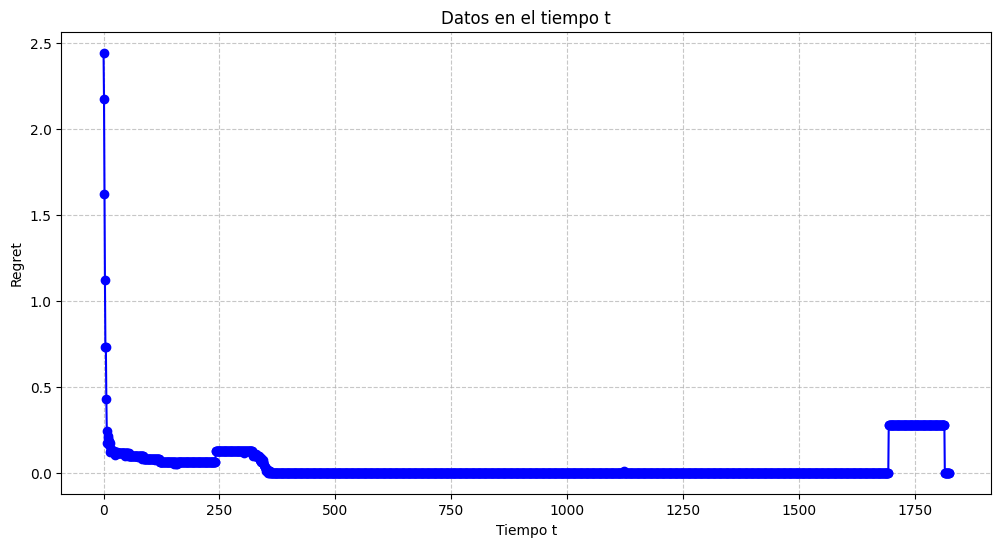

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(range(len(regrets_promedio)),regrets_promedio , marker='o', linestyle='-', color='b')
plt.title("Datos en el tiempo t")
plt.xlabel("Tiempo t")
plt.ylabel("Regret")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


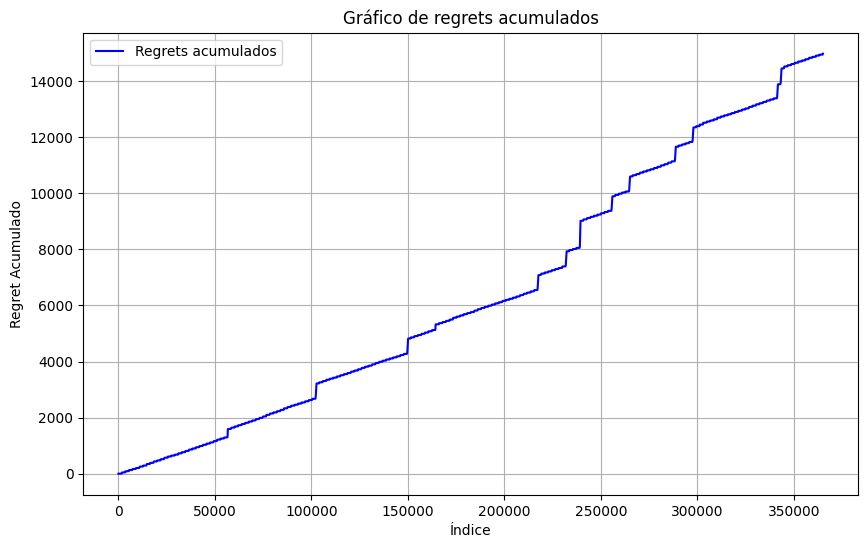

In [19]:
# Calcular el acumulado
regrets_acumulado = np.cumsum(regrets_totales)

# Graficar el acumulado
plt.figure(figsize=(10, 6))
plt.plot(regrets_acumulado, label="Regrets acumulados", color='b')
plt.title("Gráfico de regrets acumulados")
plt.xlabel("Índice")
plt.ylabel("Regret Acumulado")
plt.grid(True)
plt.legend()
plt.show()

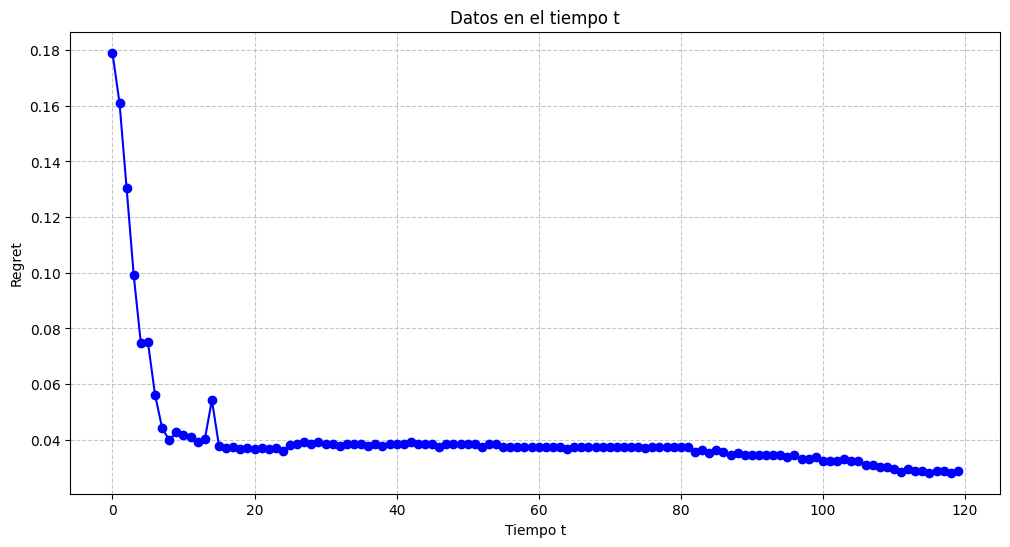

In [21]:
import matplotlib.pyplot as plt
regrets_promedios_sim = [np.mean(regrets_promedio[i::ventana_adts-1]) for i in range(ventana_adts-1)]
plt.figure(figsize=(12, 6))
plt.plot(range(len(regrets_promedios_sim)), regrets_promedios_sim, marker='o', linestyle='-', color='b')
plt.title("Datos en el tiempo t")
plt.xlabel("Tiempo t")
plt.ylabel("Regret")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

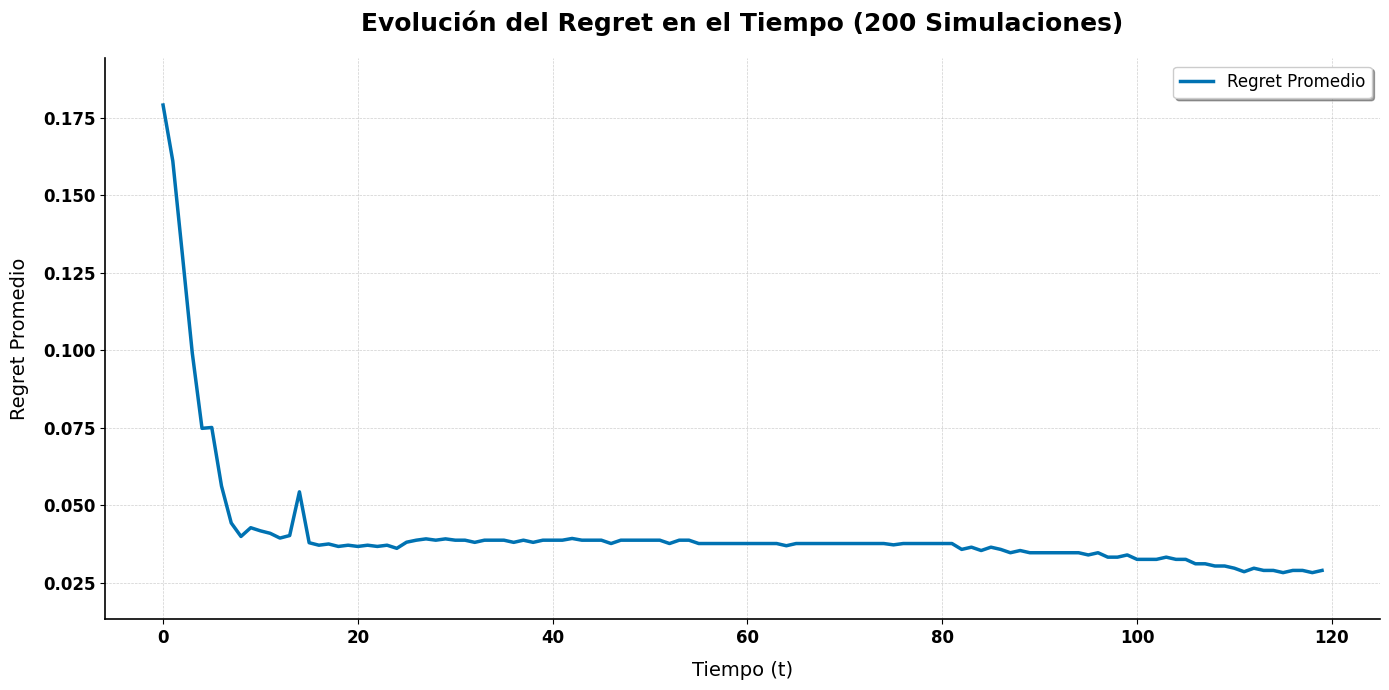

In [ ]:
import matplotlib.pyplot as plt

# Assuming regrets_promedios_sim is already defined
plt.figure(figsize=(14, 7))

# Plotting with enhanced styling
plt.plot(
    range(len(regrets_promedios_sim)),
    regrets_promedios_sim,
    linestyle='-',  # Continuous line
    linewidth=2.5,  # Thicker line for better visibility
    color='#0072B2',  # Aesthetic color
    label='Regret Promedio'
)

# Enhancing title and labels
plt.title("Evolución del Regret en el Tiempo (200 Simulaciones)", fontsize=18, fontweight='bold', pad=20)
plt.xlabel("Tiempo (t)", fontsize=14, labelpad=10)
plt.ylabel("Regret Promedio", fontsize=14, labelpad=10)

# Grid enhancements
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)

# Styling ticks
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

# Adding a border for better aesthetics
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(1.2)
plt.gca().spines['bottom'].set_linewidth(1.2)

# Adding margin to the plot
plt.margins(x=0.05, y=0.1)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()
